In [2]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os

# Initial FASERvSi studies

Detector setup:
132 layers of Tungsten and 'SCT' (sensitive vacuum)
Tungsten layers are 0.9 mm thick
Gap between Tungsten sheets is 0.5 mm
1000 events generated - mix of $\nu_e$, $\nu_\mu$ and $\nu_\tau$

Real gap *should* be 7.08 mm but there seems to be an issue with the GENIE code which is preventing neutrinos from being generated in that setup

In [3]:
data = uproot.open("../GeantOutput/FASERvSi_0.5mmThickSCT.HITS.root")

In [4]:
def get_pos_and_energy(uproot_data, particle_type, event_number=None):
    allowed_types = ["ep", "em", "mm",  "mp", "hm", "hp"]
    if particle_type not in allowed_types:
        raise ValueError(f"particle_type must be one of these {allowed_types}")

    kin_suffixes = ["x", "y", "z", "E"]
    
    
    kinematics = uproot_data.arrays([f"{particle_type}_{k}" for k in kin_suffixes], library="np")
    
    if event_number is None:
        return {"x": kinematics[f"{particle_type}_x"], "y": kinematics[f"{particle_type}_y"], "z": kinematics[f"{particle_type}_z"], "E": kinematics[f"{particle_type}_E"]}
    
    return {"x": kinematics[f"{particle_type}_x"][event_number], "y": kinematics[f"{particle_type}_y"][event_number], "z": kinematics[f"{particle_type}_z"][event_number], "E": kinematics[f"{particle_type}_E"][event_number]}
    

In [5]:
hits = [data[treename] for treename in data.keys()]

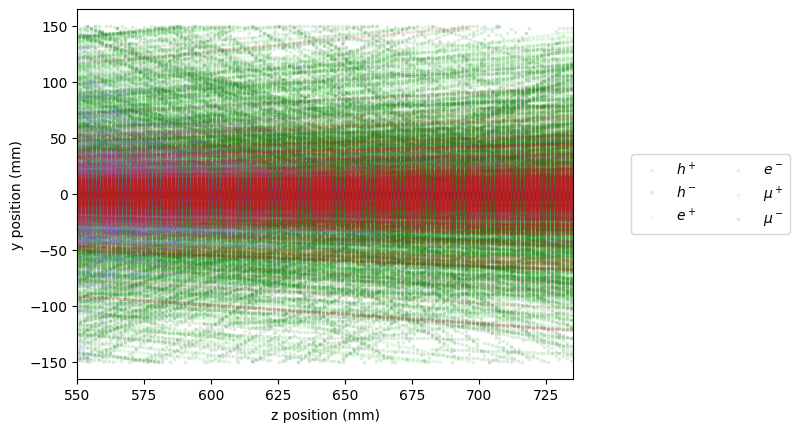

In [40]:
fig, ax = plt.subplots()

for station in hits:
    eplus_kin = get_pos_and_energy(station, "ep")   # Electrons
    eminus_kin = get_pos_and_energy(station, "em")
    
    mplus_kin = get_pos_and_energy(station, "mp")   # Muons
    mminus_kin = get_pos_and_energy(station, "mm") 
    
    hplus_kin = get_pos_and_energy(station, "hp")   # Hadrons
    hminus_kin = get_pos_and_energy(station, "hm")
    
    marker_size = 1
    alpha = 0.1
    
    ax.scatter(hplus_kin["z"], hplus_kin["y"], color='limegreen', marker=",", label=r"$h^+$", alpha=alpha, s=marker_size)
    ax.scatter(hminus_kin["z"], hminus_kin["y"], color='forestgreen', marker=",", label=r"$h^-$", alpha=alpha, s=marker_size)
    
    ax.scatter(eplus_kin["z"], eplus_kin["y"], color='lightblue', marker=",", label=r"$e^+$", alpha=alpha, s=marker_size)
    ax.scatter(eminus_kin["z"], eminus_kin["y"], color='mediumslateblue', marker=",", label=r"$e^-$", alpha=alpha, s=marker_size)
    
    ax.scatter(mplus_kin["z"], mplus_kin["y"], color='tomato', marker=",", label=r"$\mu^+$", alpha=alpha, s=marker_size)
    ax.scatter(mminus_kin["z"], mminus_kin["y"], color='firebrick', marker=",", label=r"$\mu^-$", alpha=alpha, s=marker_size)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), ncols=2, loc='center right', bbox_to_anchor=(1.45, 0.5))
ax.set_xlabel("z position (mm)")
ax.set_ylabel("y position (mm)")
ax.set_xlim((550, 735))
plt.savefig("FASERvSi-0.5mmSCT-particle-dist-z-y.pdf")

In [6]:

os.makedirs("eventPlots/FASERvSi-0.5mmSCT", exist_ok=True)

for i in range(50):

    fig, ax = plt.subplots()
    for station in hits:
        eplus_kin = get_pos_and_energy(station, "ep", i)   # Electrons
        eminus_kin = get_pos_and_energy(station, "em", i)
        
        mplus_kin = get_pos_and_energy(station, "mp", i)   # Muons
        mminus_kin = get_pos_and_energy(station, "mm", i) 
        
        hplus_kin = get_pos_and_energy(station, "hp", i)   # Hadrons
        hminus_kin = get_pos_and_energy(station, "hm", i)
        
        marker_size = 1
        alpha = 1
        
        ax.scatter(hplus_kin["z"], hplus_kin["y"], color='limegreen', marker=",", label=r"$h^+$", alpha=alpha, s=marker_size)
        ax.scatter(hminus_kin["z"], hminus_kin["y"], color='forestgreen', marker=",", label=r"$h^-$", alpha=alpha, s=marker_size)
        
        ax.scatter(eplus_kin["z"], eplus_kin["y"], color='lightblue', marker=",", label=r"$e^+$", alpha=alpha, s=marker_size)
        ax.scatter(eminus_kin["z"], eminus_kin["y"], color='mediumslateblue', marker=",", label=r"$e^-$", alpha=alpha, s=marker_size)
        
        ax.scatter(mplus_kin["z"], mplus_kin["y"], color='tomato', marker=",", label=r"$\mu^+$", alpha=alpha, s=marker_size)
        ax.scatter(mminus_kin["z"], mminus_kin["y"], color='firebrick', marker=",", label=r"$\mu^-$", alpha=alpha, s=marker_size)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), ncols=2, loc='center right', bbox_to_anchor=(1.45, 0.5))
    ax.set_xlabel("z position (mm)")
    ax.set_ylabel("y position (mm)")
    # ax.set_xlim((550, 735))
    plt.savefig(f"eventPlots/FASERvSi-0.5mmSCT/event_{i}_particle-dist-z-y.png", dpi=300)
    plt.close()